In [ ]:
url = "https://upload.wikimedia.org/wikipedia/commons/5/50/Puggle_puppy_%28cropped%29.jpg"
import torch, os, math, gzip, pickle
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
from pathlib import Path
from torch import tensor
import torchvision as tv
import torchvision.transforms.functional as tvf
from torchvision import io
from torch.utils.cpp_extension import load_inline

In [ ]:
path_img = Path("dog.jpg")
if not path_img.exists(): urlretrieve(url, path_img)


In [ ]:
img = io.read_image("dog.jpg")
print(img.shape) # 3 sides (3 channels), 1358 rows, 1117 cols pixels each row for 2 channels displayed
# are intensities of channel in portion of image

# 2 sides, 3 rows, 4 columns
img[:2, :3, :4]

torch.Size([3, 1358, 1117])


tensor([[[137, 124, 105,  82],
         [138, 121, 104,  81],
         [138, 121, 103,  79]],

        [[170, 157, 142, 120],
         [171, 155, 138, 119],
         [170, 155, 138, 115]]], dtype=torch.uint8)

In [ ]:
def show_img(x, figsize=(4,3), **kwargs): # kwargs to accept a variable name of parameters passed to another func (cmap)
    plt.figure(figsize=figsize)
    plt.axis("off")
    if len(x.shape) == 3: x = x.permute(1,2,0) # CHW -> HWC
    plt.imshow(x.cpu(), **kwargs)

In [ ]:
img2 = tvf.resize(img, 150, antialias=True) # antialiasing for clear quality after resizing 150
ch, h, w = img2.shape
ch, h, w, h*w

(3, 182, 150, 27300)

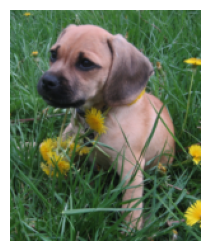

In [ ]:
show_img(img2)

In [ ]:
def rgb2grey_py(img, **kwargs):
  c,h,w = img.shape
  n = h*w
  x = img.flatten() # to turn rgb to gray 3 channels to 1
  # But first flatten out lets say 2x2 image, 3 channels 3 2x2 arrays
  # now the r g and b are distanced by n
  res = torch.empty(n, dtype=x.dtype, device=x.device)
  for i in range(n): res[i] = 0.2989*x[i] + 0.5870*x[i+n] + 0.1140*x[i+(2*n)]
  return res.view(h,w) # turn it back into h w to view

In [ ]:
print("Tensor is on:", img.device)

Tensor is on: cpu


In [ ]:
%%time
res = rgb2grey_py(img2)

CPU times: user 1.07 s, sys: 3.03 ms, total: 1.07 s
Wall time: 1.07 s


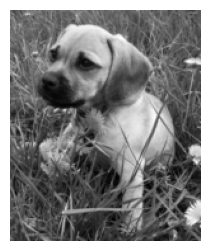

In [ ]:
show_img(res, cmap="gray")

In [ ]:
# CUDA why its faster
# Uses Kernel
# 3090 GPU has 82 SMs (Streaming MultiProcessors)
# Each SM has 128 cuda cores
# 128 * 82 = 10496 cuda cores
# all threads in a block have ability to operate parallel (concurrently)